# Hands-On Pertemuan 9: Spark SQL

## Tujuan:
- Mengasah keterampilan analisis data menggunakan Spark SQL.
- Melakukan lebih banyak latihan SQL yang mengarah ke skenario dunia nyata.
- Mempersiapkan mahasiswa untuk menggunakan Spark SQL dalam proyek besar.


### 1. Refresher: Basic SQL Operations in Spark SQL
- **Tugas 1**: Ulangi pemahaman Anda tentang SQL dasar dengan menjalankan queries sederhana pada dataset di Spark SQL.


In [ ]:
pip install pyspark

In [ ]:
data = [
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1)
]
columns = ['Name', 'Age', 'Gender', 'Salary', 'DeptId']
df = spark.createDataFrame(data, schema=columns)
df.createOrReplaceTempView('employees')
spark.sql('SELECT * FROM employees').show()
spark.sql('SELECT Name, Age FROM employees WHERE Salary > 3000').show()
spark.sql('SELECT AVG(Salary) FROM employees').show()

In [ ]:
#Kode sudah diubah ubah disini

from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("CobaSpark").getOrCreate()

data = [
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1)
]

columns = ['Name', 'Age', 'Gender', 'Salary', 'DeptId']
df = spark.createDataFrame(data, schema=columns)
df.show()
df.filter(df["Salary"] > 3000).select("Name", "Age").show()
df.agg({"Salary": "avg"}).show()

df.createOrReplaceTempView('employees')
spark.sql('SELECT * FROM employees').show()
spark.sql('SELECT Name, Age FROM employees WHERE Salary > 3000').show()
spark.sql('SELECT AVG(Salary) FROM employees').show()


+-----+---+------+------+------+
| Name|Age|Gender|Salary|DeptId|
+-----+---+------+------+------+
|James| 34|     M|  3000|     1|
| Anna| 28|     F|  4100|     2|
|  Lee| 23|     M|  2700|     1|
+-----+---+------+------+------+

+----+---+
|Name|Age|
+----+---+
|Anna| 28|
+----+---+

+------------------+
|       avg(Salary)|
+------------------+
|3266.6666666666665|
+------------------+

+-----+---+------+------+------+
| Name|Age|Gender|Salary|DeptId|
+-----+---+------+------+------+
|James| 34|     M|  3000|     1|
| Anna| 28|     F|  4100|     2|
|  Lee| 23|     M|  2700|     1|
+-----+---+------+------+------+

+----+---+
|Name|Age|
+----+---+
|Anna| 28|
+----+---+

+------------------+
|       avg(Salary)|
+------------------+
|3266.6666666666665|
+------------------+



### 2. Advanced Queries for Data Analysis
Gunakan queries lebih kompleks, melibatkan grouping, filtering, dan subqueries.
- **Tugas 2**: Buat SQL query yang menghitung total gaji berdasarkan jenis kelamin dan usia.


In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("CobaSpark").getOrCreate()

data = [
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1),
    ('Meimei', 24, 'F', 3500, 2)
]

columns = ['Name', 'Age', 'Gender', 'Salary', 'DeptId']
df = spark.createDataFrame(data, schema=columns)
df.createOrReplaceTempView('employees')

In [ ]:
spark.sql('''
SELECT Gender, SUM(Salary) as TotalSalary, Age
FROM employees
GROUP BY Gender, Age
ORDER BY Age
''').show()


+------+-----------+---+
|Gender|TotalSalary|Age|
+------+-----------+---+
|     M|       2700| 23|
|     F|       3500| 24|
|     F|       4100| 28|
|     M|       3000| 34|
+------+-----------+---+



In [ ]:
#SQL query yang menghitung total gaji berdasarkan jenis kelamin dan usia.

spark.sql('''
SELECT Gender, Age, SUM(Salary) as TotalSalary
FROM employees
GROUP BY Gender, Age;
''').show()

In [ ]:
#Rata-rata gaji per departemen

spark.sql('''
select DeptId, AVG(Salary) as Rata_Rata_Gaji
from employees
group by DeptId
''').show()

+------+--------------+
|DeptId|Rata_Rata_Gaji|
+------+--------------+
|     1|        2850.0|
|     2|        3800.0|
+------+--------------+



In [ ]:
#Karyawan yang memiliki gaji di atas rata-rata untuk jenis kelamin masing-masing

spark.sql('''
select employees.Name, employees.Gender, employees.Salary
from employees
join (
  select Gender, AVG(Salary) as RerataGaji
  from employees
  group by Gender
) as rata_rata on employees.Gender = rata_rata.Gender
where employees.Salary > rata_rata.RerataGaji
''').show()


+-----+------+------+
| Name|Gender|Salary|
+-----+------+------+
| Anna|     F|  4100|
|James|     M|  3000|
+-----+------+------+



In [ ]:
#Rangking karyawan berdasarkan gaji dalam departemen mereka

spark.sql('''
select Name, DeptId, Salary,
row_number() over (partition BY DeptId order by Salary desc) as rank
from employees
where DeptId = 1
''').show()

spark.sql('''
select Name, DeptId, Salary,
row_number() over (partition BY DeptId order by Salary desc) as rank
from employees
where DeptId = 2
''').show()

+-----+------+------+----+
| Name|DeptId|Salary|rank|
+-----+------+------+----+
|James|     1|  3000|   1|
|  Lee|     1|  2700|   2|
+-----+------+------+----+

+------+------+------+----+
|  Name|DeptId|Salary|rank|
+------+------+------+----+
|  Anna|     2|  4100|   1|
|Meimei|     2|  3500|   2|
+------+------+------+----+



- **Tugas Tambahan 2**:
1. Cari rata-rata gaji per departemen.
2. Temukan karyawan yang memiliki gaji di atas rata-rata untuk gender masing-masing.
3. Buat ranking karyawan berdasarkan gaji dalam departemen mereka.


### 3. Penggunaan Window Functions dan Subqueries
Latihan penggunaan window functions untuk menemukan karyawan dengan gaji tertinggi dan urutannya berdasarkan kelompok usia.
- **Tugas 3**: Terapkan window functions untuk menemukan top 3 karyawan dalam kelompok usia tertentu.


In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("CobaSpark").getOrCreate()

data = [
    ('James', 23, 'M', 3000, 1),
    ('Anna', 23, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1),
    ('Meimei', 23, 'F', 3500, 2)
]

columns = ['Name', 'Age', 'Gender', 'Salary', 'DeptId']
df = spark.createDataFrame(data, schema=columns)
df.createOrReplaceTempView('employees')

In [ ]:
spark.sql('''
SELECT Name, Age, Salary, ROW_NUMBER() OVER (PARTITION BY Age ORDER BY Salary DESC) as rank
FROM employees
''').show()

+------+---+------+----+
|  Name|Age|Salary|rank|
+------+---+------+----+
|  Anna| 23|  4100|   1|
|Meimei| 23|  3500|   2|
| James| 23|  3000|   3|
|   Lee| 23|  2700|   4|
+------+---+------+----+



### 4. Advanced Spark SQL Queries
Menjelajahi queries yang lebih kompleks yang melibatkan multiple joins, subqueries, dan window functions.
- **Tugas 4**: Demonstrasi penggunaan multi-level joins dan subqueries untuk analisis data yang mendalam.


In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Pertemuan9').getOrCreate()

# Data setup for complex SQL queries
employees = spark.createDataFrame([
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1)
], ['Name', 'Age', 'Gender', 'Salary', 'DeptId'])
departments = spark.createDataFrame([
    (1, 'HR'),
    (2, 'Marketing')
], ['DeptId', 'DeptName'])
projects = spark.createDataFrame([
    (1, 'Project A'),
    (2, 'Project B')
], ['DeptId', 'ProjectName'])
employees.createOrReplaceTempView('employees')
departments.createOrReplaceTempView('departments')
projects.createOrReplaceTempView('projects')

# Complex SQL query involving multiple joins and subqueries
spark.sql('''
SELECT e.Name, e.Age, d.DeptName, p.ProjectName
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
JOIN projects p ON e.DeptId = p.DeptId
''').show()


+-----+---+---------+-----------+
| Name|Age| DeptName|ProjectName|
+-----+---+---------+-----------+
|  Lee| 23|       HR|  Project A|
|James| 34|       HR|  Project A|
| Anna| 28|Marketing|  Project B|
+-----+---+---------+-----------+



In [ ]:
# Tuliskan query SQL untuk menemukan rata-rata gaji per departemen dan rangking setiap karyawan dalam departemen berdasarkan gaji.

spark.sql('''
SELECT DeptId, AVG(Salary) AS AvgSalary
FROM employees
GROUP BY DeptId
''').show()

spark.sql('''
SELECT Name, DeptId, Salary,
       RANK() OVER (PARTITION BY DeptId ORDER BY Salary DESC) AS SalaryRank
FROM employees
ORDER BY DeptId, SalaryRank
''').show()

+------+---------+
|DeptId|AvgSalary|
+------+---------+
|     1|   2850.0|
|     2|   4100.0|
+------+---------+

+-----+------+------+----------+
| Name|DeptId|Salary|SalaryRank|
+-----+------+------+----------+
|James|     1|  3000|         1|
|  Lee|     1|  2700|         2|
| Anna|     2|  4100|         1|
+-----+------+------+----------+



In [ ]:
#Gunakan window functions untuk menentukan tren gaji berdasarkan usia di setiap departemen.

spark.sql('''
SELECT Name, DeptId, Age, Salary,
       AVG(Salary) OVER (PARTITION BY DeptId ORDER BY Age) AS AvgSalaryByAge
FROM employees
ORDER BY DeptId, Age
''').show()

+-----+------+---+------+--------------+
| Name|DeptId|Age|Salary|AvgSalaryByAge|
+-----+------+---+------+--------------+
|  Lee|     1| 23|  2700|        2700.0|
|James|     1| 34|  3000|        2850.0|
| Anna|     2| 28|  4100|        4100.0|
+-----+------+---+------+--------------+



Latihan mandiri untuk memperkuat pemahaman tentang Spark SQL dalam analisis data terdistribusi.
- **Tugas 5**: Tuliskan query SQL untuk menemukan rata-rata gaji per departemen dan rangking setiap karyawan dalam departemen berdasarkan gaji.
- **Tugas 6**: Gunakan window functions untuk menentukan tren gaji berdasarkan usia di setiap departemen.


### 5. Advanced Data Analysis and Visualization
Penerapan teknik analisis data yang lebih canggih dan visualisasi menggunakan PySpark dan matplotlib.
- **Tugas 7**: Lakukan analisis tren gaji menggunakan Spark SQL dan visualisasikan hasilnya.


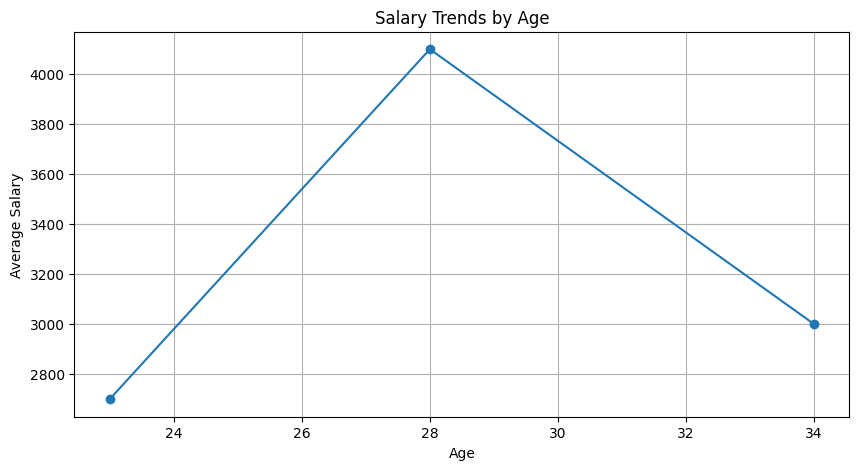

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

salary_trends = spark.sql('''
SELECT Age, AVG(Salary) AS AverageSalary
FROM employees
GROUP BY Age
ORDER BY Age
''').toPandas()

plt.figure(figsize=(10, 5))
plt.plot(salary_trends['Age'], salary_trends['AverageSalary'], marker='o')
plt.xlabel('Age')
plt.ylabel('Average Salary')
plt.title('Salary Trends by Age')
plt.grid(True)
plt.show()

### 6. Homework
- **Tugas 1**: Gunakan Spark SQL untuk mencari total gaji dan jumlah karyawan per departemen. Buat visualisasi perbandingan antar departemen.
- **Tugas 2**: Temukan karyawan dengan gaji di atas rata-rata dalam setiap kelompok usia dan visualisasikan data ini dalam bentuk grafik batang atau pie chart.
- **Tugas 3**: Buat dataset yang lebih besar (misalnya, 100+ baris) dan lakukan analisis mendalam menggunakan SQL functions seperti `SUM()`, `AVG()`, `COUNT()`, serta `JOIN` antar tabel serta buat visualisasi yang menarik.


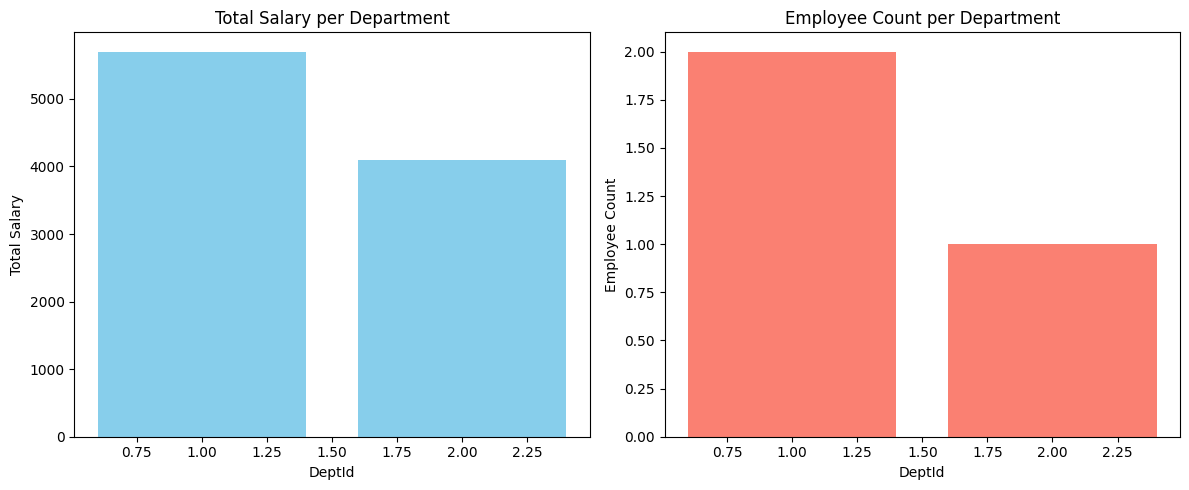

In [ ]:
#Tugas 1

import matplotlib.pyplot as plt

dept_data = spark.sql('''SELECT DeptId, SUM(Salary) AS TotalSalary, COUNT(Name) AS EmployeeCount
                         FROM employees
                         GROUP BY DeptId''').toPandas()
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].bar(dept_data['DeptId'], dept_data['TotalSalary'], color='skyblue')
ax[0].set_title('Total Salary per Department')
ax[0].set_xlabel('DeptId')
ax[0].set_ylabel('Total Salary')
ax[1].bar(dept_data['DeptId'], dept_data['EmployeeCount'], color='salmon')
ax[1].set_title('Employee Count per Department')
ax[1].set_xlabel('DeptId')
ax[1].set_ylabel('Employee Count')
plt.tight_layout()
plt.show()


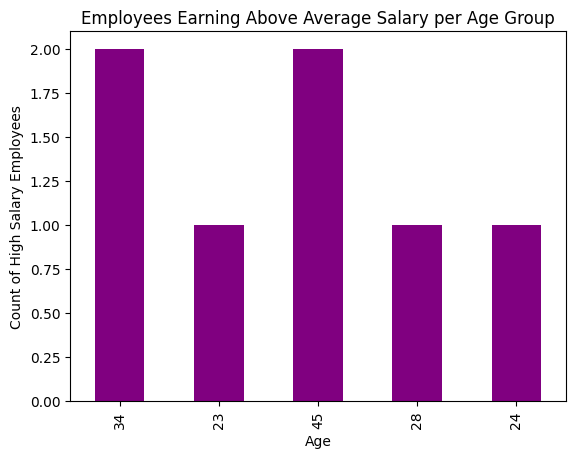

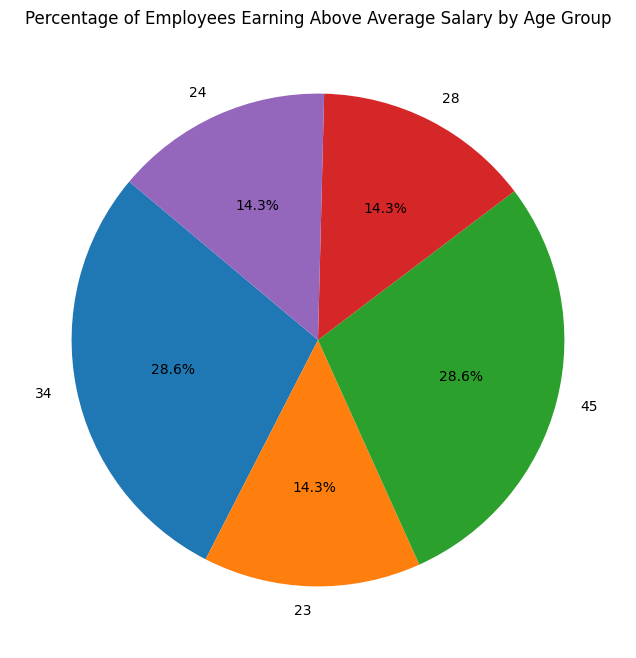

In [ ]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import pandas as pd

spark = SparkSession.builder.appName('SalaryAnalysis').getOrCreate()

data = [
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 6000, 2),
    ('Lee', 23, 'M', 2500, 1),
    ('Mei', 24, 'F', 4500, 2),
    ('John', 45, 'M', 8000, 1),
    ('Jane', 45, 'F', 9000, 1),
    ('Steve', 34, 'M', 3500, 1),
    ('Lucy', 28, 'F', 5000, 2),
    ('Tom', 34, 'M', 2800, 1),
    ('Lily', 23, 'F', 2000, 2),
    ('Mike', 24, 'M', 7000, 2),
    ('Alice', 28, 'F', 7500, 2),
    ('Bob', 34, 'M', 3200, 1),
    ('Eve', 23, 'F', 2100, 1),
    ('Sam', 45, 'M', 6000, 1)
]

columns = ['Name', 'Age', 'Gender', 'Salary', 'DeptId']
employees = spark.createDataFrame(data, columns)
employees.createOrReplaceTempView('employees')

high_salary_data = spark.sql('''
    WITH AvgSalaryByAge AS (
        SELECT Age, AVG(Salary) AS AvgSalary
        FROM employees
        GROUP BY Age
    )
    SELECT e.Age, COUNT(e.Name) AS HighSalaryCount
    FROM employees e
    JOIN AvgSalaryByAge a ON e.Age = a.Age
    WHERE e.Salary > a.AvgSalary
    GROUP BY e.Age
''').toPandas()

# Visualisasi data dalam bentuk grafik batang
high_salary_data.plot(kind='bar', x='Age', y='HighSalaryCount', color='purple', legend=False)
plt.xlabel('Age')
plt.ylabel('Count of High Salary Employees')
plt.title('Employees Earning Above Average Salary per Age Group')
plt.show()

print("\n")

# Visualisasi data dalam bentuk pie chart
plt.figure(figsize=(8, 8))
plt.pie(high_salary_data['HighSalaryCount'], labels=high_salary_data['Age'], autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Employees Earning Above Average Salary by Age Group')
plt.show()


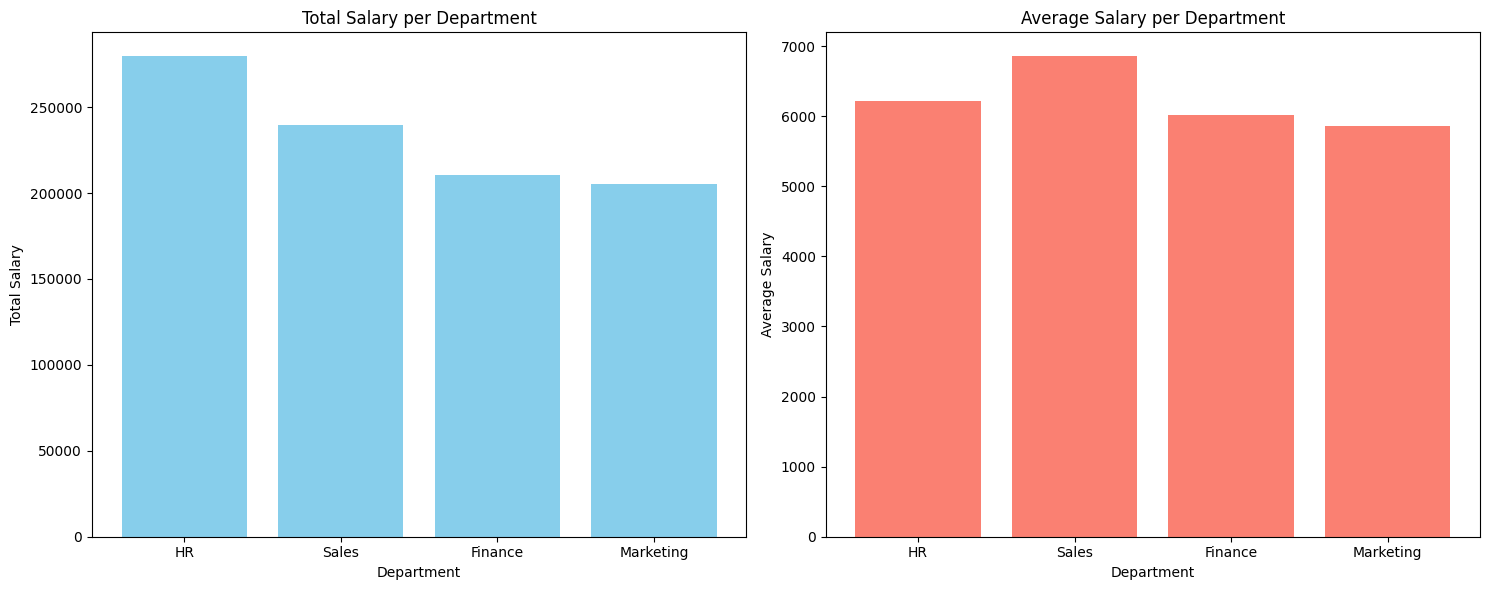

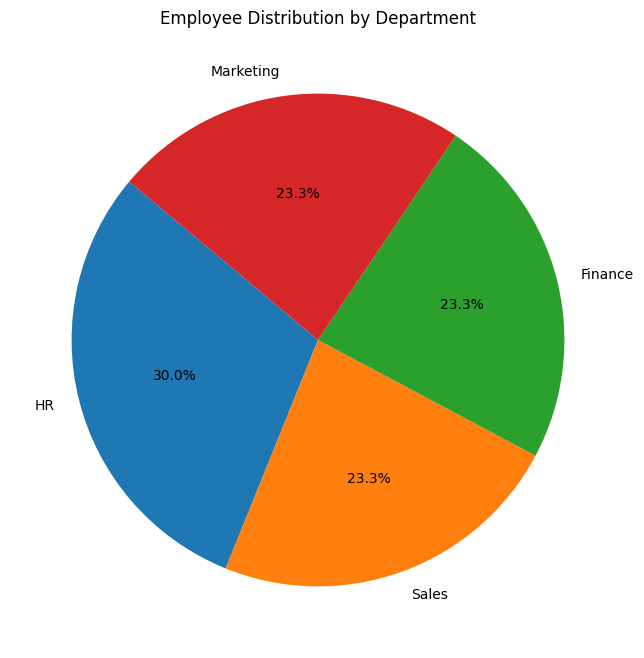

In [ ]:
# Tugas 3

from pyspark.sql import SparkSession
import matplotlib.pyplot as plt

# Membuat Spark session
spark = SparkSession.builder.appName('DeepAnalysis').getOrCreate()

# Membuat dataset besar dengan lebih dari 100 baris data
import random
names = ['James', 'Anna', 'Lee', 'Mei', 'John', 'Jane', 'Steve', 'Lucy', 'Tom', 'Lily', 'Mike', 'Alice', 'Bob', 'Eve', 'Sam']
departments = [(1, 'HR'), (2, 'Marketing'), (3, 'Sales'), (4, 'Finance')]
employees_data = [(random.choice(names), random.randint(22, 60), random.choice(['M', 'F']), random.randint(2500, 10000), random.choice([1, 2, 3, 4])) for _ in range(150)]
projects_data = [(i+1, f'Project {chr(65 + i)}') for i in range(4)]

# Membuat DataFrame untuk karyawan, departemen, dan proyek
employees = spark.createDataFrame(employees_data, ['Name', 'Age', 'Gender', 'Salary', 'DeptId'])
departments_df = spark.createDataFrame(departments, ['DeptId', 'DeptName'])
projects_df = spark.createDataFrame(projects_data, ['DeptId', 'ProjectName'])

# Menyimpan DataFrame sebagai tabel SQL
employees.createOrReplaceTempView('employees')
departments_df.createOrReplaceTempView('departments')
projects_df.createOrReplaceTempView('projects')

# Query untuk total gaji, rata-rata gaji, dan jumlah karyawan per departemen
dept_analysis = spark.sql('''
    SELECT d.DeptName, COUNT(e.Name) AS EmployeeCount, SUM(e.Salary) AS TotalSalary, AVG(e.Salary) AS AvgSalary
    FROM employees e
    JOIN departments d ON e.DeptId = d.DeptId
    GROUP BY d.DeptName
    ORDER BY TotalSalary DESC
''').toPandas()

# Query untuk peringkat gaji karyawan di setiap departemen
ranked_salaries = spark.sql('''
    SELECT e.Name, d.DeptName, e.Salary,
           RANK() OVER (PARTITION BY e.DeptId ORDER BY e.Salary DESC) AS SalaryRank
    FROM employees e
    JOIN departments d ON e.DeptId = d.DeptId
    ORDER BY d.DeptName, SalaryRank
''').toPandas()

# Visualisasi total dan rata-rata gaji per departemen menggunakan bar chart
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Bar chart Total Salary per Department
ax[0].bar(dept_analysis['DeptName'], dept_analysis['TotalSalary'], color='skyblue')
ax[0].set_title('Total Salary per Department')
ax[0].set_xlabel('Department')
ax[0].set_ylabel('Total Salary')


# Bar chart Avg Salary per Department
ax[1].bar(dept_analysis['DeptName'], dept_analysis['AvgSalary'], color='salmon')
ax[1].set_title('Average Salary per Department')
ax[1].set_xlabel('Department')
ax[1].set_ylabel('Average Salary')

plt.tight_layout()
plt.show()

print("\n")

# Pie chart untuk distribusi jumlah karyawan per departemen
plt.figure(figsize=(8, 8))
plt.pie(dept_analysis['EmployeeCount'], labels=dept_analysis['DeptName'], autopct='%1.1f%%', startangle=140)
plt.title('Employee Distribution by Department')
plt.show()
